# ```CS F320 - FOUNDATIONS OF DATA SCIENCE```

## ```ASSIGNMENT 2B - PCA Analysis and Determining Optimal Number of Components```

### ```TEAM MEMBERS: ```
        1. Pavas Garg - 2021A7PS2587H
        2. Tushar Raghani - 2021A7PS1404H
        3. Rohan Pothireddy - 2021A7PS0365H 
    

# ```Importing the Libraries```


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

## `⏳ Loading the Dataset`


In [2]:
df = pd.read_csv("Hitters.csv")
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [3]:
# checking categorical variables
df.select_dtypes(exclude=['number'])

,League,Division,NewLeague
0,A,E,A
1,N,W,N
2,A,W,A
3,N,E,N
4,N,E,N
...,...,...,...
317,N,E,N
318,A,E,A
319,A,W,A
320,A,E,A


## ```Dropping Categorical Variables```

In [4]:
# Drop all categorical columns
df = df.select_dtypes(exclude='object')
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3,700.0
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20,875.0
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7,385.0
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,960.0


## ```1. Data Understanding and Representation```

In [5]:
print("Number of records in the given dataset are: ",len(df))
print("Number of features in the given dataset are: ",len(df.columns)-1)

Number of records in the given dataset are:  322
Number of features in the given dataset are:  16


# ```🔬Preprocess and perform exploratory data analysis of the dataset obtained```

## `Replacing NULL values with mean`

In [6]:
# to check if null values or NAN are present in the dataset
nan_count = df.isna().sum().sum()
null_count = df.isnull().sum().sum()
print("NAN count: ",nan_count)
print("NULL count: ",null_count)

NAN count:  59
NULL count:  59


In [7]:
def find_mean(dataset, feature):
    n = len(dataset[feature])
    total_sum = 0
    count_valid_values = 0

    for val in dataset[feature]:
        if isinstance(val, (int, float)) and not np.isnan(val):
            total_sum += val
            count_valid_values += 1

    if count_valid_values == 0:
        return 0

    mean = total_sum / count_valid_values
    return mean

In [8]:
for feature in df.columns:
    mean = find_mean(df, feature)
    print(feature)
    print(mean)

AtBat
380.92857142857144
Hits
101.0248447204969
HmRun
10.770186335403727
Runs
50.909937888198755
RBI
48.02795031055901
Walks
38.74223602484472
Years
7.444099378881988
CAtBat
2648.6832298136646
CHits
717.5714285714286
CHmRun
69.49068322981367
CRuns
358.7950310559006
CRBI
330.11801242236027
CWalks
260.2391304347826
PutOuts
288.9378881987578
Assists
106.91304347826087
Errors
8.040372670807454
Salary
535.9258821292775


In [9]:
pd.set_option('mode.chained_assignment', None)

In [10]:
for feature in df.columns:
    mean = find_mean(df,feature)
    df[feature].fillna(mean,inplace=True)

In [11]:
nan_count = df.isna().sum().sum()
null_count = df.isnull().sum().sum()
print("NAN count: ",nan_count)
print("NULL count: ",null_count)

NAN count:  0
NULL count:  0


# `📊 Plotting Histograms`

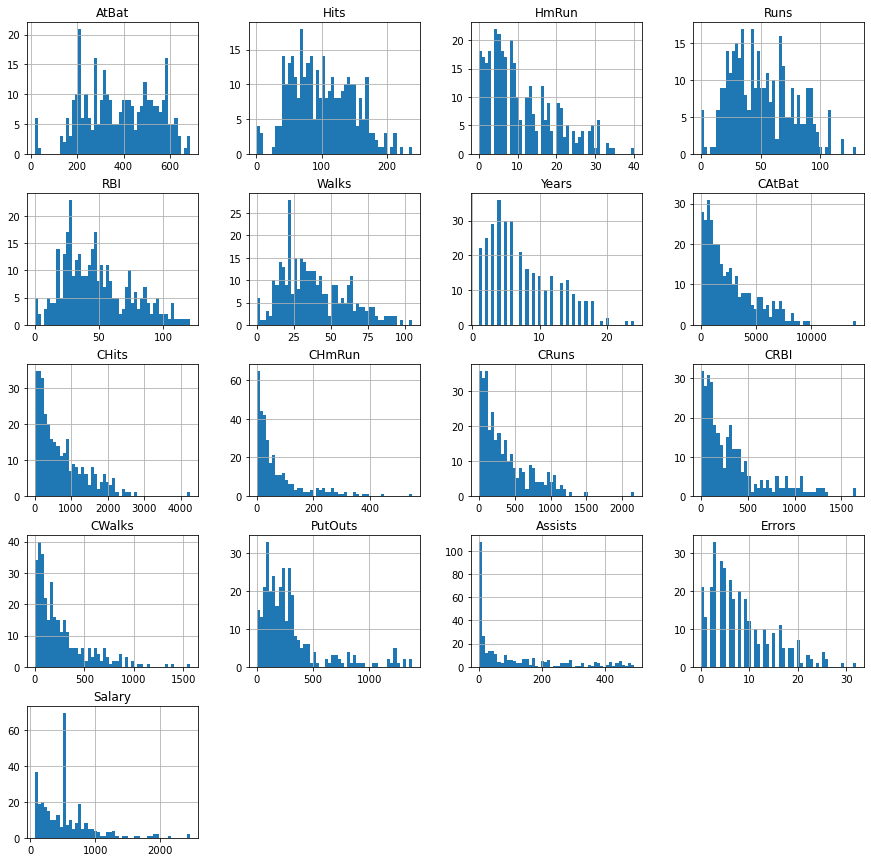

In [12]:
df.hist(bins=50,figsize=(15,15))
plt.show()

In [13]:
# shifting the target attribute to the right most column of the dataset
column_to_shift = 'Salary'
shifted_column = df.pop(column_to_shift)
df[column_to_shift] = shifted_column

In [14]:
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,535.925882
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.000000
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.000000
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.000000
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3,700.000000
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20,875.000000
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7,385.000000
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,960.000000


## ```Feature Scaling```

### Normalization Method
- Normalization is performed to transform the data to have a mean of 0 and standard deviation of 1
- Normalization is also known as Z-Score Normalization

\begin{equation}
z = \frac{(x-\mu)}{\sigma}
\end{equation}

In [15]:
# function for finding mean of a feature in a given dataset
def find_mean(dataset,feature):
    n = len(dataset[feature])
    sum = 0
    for val in dataset[feature]:
        sum += val
    return sum/n

In [16]:
# function for finding standard deviation of a feature in a given dataset
def find_standard_deviation(dataset,feature):
    variance, squared_sum = 0,0
    n = len(dataset[feature])
    mean = find_mean(dataset,feature)
    for val in dataset[feature]:
        squared_sum += (val-mean)**2
    variance = squared_sum/n
    return math.sqrt(variance)

In [17]:
# function for scaling a feature in given dataset
def normalize_feature(dataset,feature):
    mean = find_mean(dataset,feature)
    standard_deviation = find_standard_deviation(dataset,feature)
    normalized_feature = []
    for val in dataset[feature]:
        normalized_feature.append((val-mean)/standard_deviation)
    return normalized_feature

In [18]:
# function for scaling (standardizing) the whole dataset
def normalize_dataset(dataset):
    df = dataset.drop(columns = 'Salary')
    normalized_df = pd.DataFrame()
    for feature in df.columns:
        normalized_result = normalize_feature(df,feature)
        normalized_df[feature] = normalized_result
        
# When copying columns from one DataFrame to another, you might get NaN values in the resulting DataFrame.
# The issue is caused because the indexes of the DataFrames are different.
# This causes the indexes for each column to be different.
# When pandas tries to align the indexes when assigning columns to the second DataFrame, it fails and inserts NaN values.
# One way to resolve the issue is to homogenize the index values.
# for eg [a,b,c,d] for df1 and indices for df2 are [1,2,3,4]
# that's why use df1.index = df2.index

    normalized_df.index = dataset.index 
    normalized_df['Salary'] = dataset['Salary']
    return normalized_df

In [19]:
# normalizing the complete dataset
df = normalize_dataset(df)
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
0,-0.574071,-0.755130,-1.123591,-0.804734,-0.728308,-1.145172,-1.310194,-1.015121,-0.997117,-0.795183,-0.985636,-0.905069,-0.923478,0.560399,-0.540924,1.880899,535.925882
1,-0.430437,-0.431732,-0.433579,-1.035649,-0.383827,0.011930,1.332925,0.344876,0.179704,-0.005697,-0.113299,0.252124,0.430391,1.224048,-0.467740,0.308192,475.000000
2,0.640293,0.624699,0.831443,0.580752,0.917547,1.724442,-0.903560,-0.441561,-0.398759,-0.075357,-0.404078,-0.192719,0.010354,2.108915,-0.182323,0.937275,480.000000
3,0.751283,0.861858,1.061447,0.542266,1.147201,-0.080638,0.722974,1.283860,1.312145,1.805477,1.406546,1.526538,0.351634,-0.317331,-0.701928,-0.792703,500.000000
4,-0.391264,-0.302373,-0.088573,-0.458363,-0.230724,-0.404626,-1.106877,-0.970736,-0.943555,-0.667472,-0.931677,-0.853972,-0.852222,1.841314,-0.489695,-0.635432,91.500000


In [20]:
# checking mean and variance of each feature after standardizing the dataset
dataset = df.drop(columns = 'Salary')
for feature in dataset:
    print("Mean of",feature,"is",round(find_mean(dataset,feature)))
    print("Standard Deviation of",feature,"is",round(find_standard_deviation(dataset,feature)))

Mean of AtBat is 0
Standard Deviation of AtBat is 1
Mean of Hits is 0
Standard Deviation of Hits is 1
Mean of HmRun is 0
Standard Deviation of HmRun is 1
Mean of Runs is 0
Standard Deviation of Runs is 1
Mean of RBI is 0
Standard Deviation of RBI is 1
Mean of Walks is 0
Standard Deviation of Walks is 1
Mean of Years is 0
Standard Deviation of Years is 1
Mean of CAtBat is 0
Standard Deviation of CAtBat is 1
Mean of CHits is 0
Standard Deviation of CHits is 1
Mean of CHmRun is 0
Standard Deviation of CHmRun is 1
Mean of CRuns is 0
Standard Deviation of CRuns is 1
Mean of CRBI is 0
Standard Deviation of CRBI is 1
Mean of CWalks is 0
Standard Deviation of CWalks is 1
Mean of PutOuts is 0
Standard Deviation of PutOuts is 1
Mean of Assists is 0
Standard Deviation of Assists is 1
Mean of Errors is 0
Standard Deviation of Errors is 1


## `Plot showing distribution of features after Normalization`

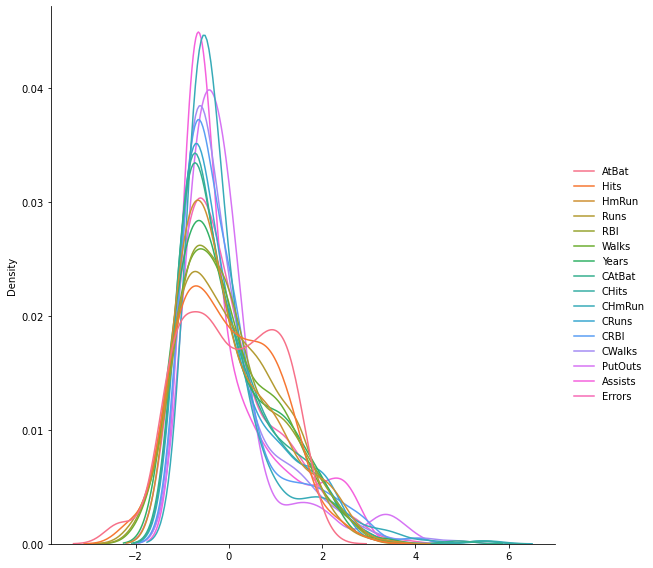

In [21]:
# all features following a normal distribution with mean 0 and standard deviation of 1
sns.displot(df.drop(columns='Salary'), kind='kde',aspect=1,height=8)
plt.show()

## ```Dimensionality Reduction using PCA (Principal Component Analysis)```

- It is used to reduce the dimensionality of dataset by transforming a large set into a lower dimensional set that still contains most of the information of the large dataset

- Principal component analysis (PCA) is a technique that transforms a dataset of many features into principal components that "summarize" the variance that underlies the data

- PCA finds a new set of dimensions such that all dimensions are orthogonal and hence linearly independent and ranked according to variance of data along them

- Eigen vectors point in direction of maximum variance among data, and eigen value gives the importance of that eigen vector

![PCA_Image](https://miro.medium.com/v2/resize:fit:1192/format:webp/1*QinDfRawRskupf4mU5bYSA.png)

- Let $x_1$, $x_2$... $x_n$ be be N training examples, each having D features.


- Mean of N training examples is given by $\bar{x}$, which can be computed as

$$
\bar{x} = \frac{1}{N} \sum_{n=1}^{N} x_{n1} + \frac{1}{N} \sum_{n=1}^{N} x_{n2}... + \frac{1}{N} \sum_{n=1}^{N} x_{nd}
$$

- Now suppose we have a graph with 2-dimensional points as follows:
![2D_points](https://i.stack.imgur.com/ym6ru.png)

- Our motive is to bring down the 2D points to 1D by projecting on a vector. We need to project the points on a 1D vector such that the variance between data points is maximum.


- We need to compute unit vector such that the variance is as maximum as possible. 


- We do some mathematical computations as follows:

$$
cos\theta = \frac{OA}{OB}
$$

$$
\bar{u}cdot\bar{x_n} = (||u||)(||x||)cos\theta
                     = (||u||)(OB)cos\theta = (||u||)(OA)
$$

- The above equation gives us the below result

$$
OA = \frac{\bar{u} \cdot \bar{x_n}}{\|u\|}
$$

- We take projection on unit vector $||u||$ = 1

- Our final result is as follows:

$$
OA = \bar{u}\cdot\bar{x_n}
$$

- The mean of the projected points is given by 

$$
\frac{1}{N}\sum_{n=1}^{N}{\bar{u}\cdot\bar{x_n}} = \bar{u}\cdot\sum_{n=1}^N\frac{x_n}{N} = \bar{u}\cdot\bar{x}
$$

- Here, $\bar{x}$ is the mean of training points in their dimension

- We then compute variance as 

$$
Variance = \frac{1}{N}\sum_{n=1}^N{(\bar{u}\cdot\bar{x_n} - \bar{u}\cdot\bar{x})^2}
$$

- We then compute $\bar{u}$ which maximizes variance as much as possible such that $||u|| = 1$

- Consider $x_n$ and $\bar{x}$ to be matrices of $d$x$1$ size represented as follows

$$
\bar{x_n}=\begin{bmatrix}
  x_1 \\
  x_2 \\
  x_3 \\
  \vdots \\
  x_d \\
\end{bmatrix}
$$


$$
\bar{x}=\begin{bmatrix}
  \bar{x_1} \\
  \bar{x_2} \\
  \bar{x_3} \\
  \vdots \\
  \bar{x_d} \\
\end{bmatrix}
$$

- Consider $\bar{u}$ to be a $1$x$d$ matrix represented by

$$
\bar{u} = [{u_1}, {u_2}...{u_d}]
$$

- We then observe that we need to maximize the following expression

$$
max[\frac{1}{N}\sum_{n=1}^{N}(\bar{u}\cdot(\bar{x_n}-\bar{x}))(\bar{u}\cdot(\bar{x_n}-\bar{x})^{T}]
$$

- While trying to maximize the above expression by expanding the same, we get

$$
max[\frac{1}{N}\sum_{n=1}^{N}(\bar{u}(x_n - \bar{x})(x_n - \bar{x})^{T}\bar{u}^{T})]
$$

- The above expression in turn becomes

$$
max[\bar{u}\frac{1}{N}[\sum_{n=1}^{N}(x_n - \bar{x})(x_n - \bar{x})^{T}]\bar{u}^{T}]
$$

- The above expression simplifies to 

$$
max[\bar{u}S\bar{u}^T] 
$$

$$
||u||=1
$$
- Here, $S$ is called covariance matrix 


- Principal Component Analysis (PCA) gives linear combination of these features to get matured features


- We then try to convert the above constraint optimization problem to an unconstrained optimization problem, as follows:

$$
E(u,\lambda) = max[\bar{u}S\bar{u}^{T} + \frac{\lambda}{2}(1-\bar{u}\bar{u}^{T})]
$$

- Taking derivation with respect to $\bar{u}$ and $\lambda$ and setting it to 0, we get final answer to be 

$$
\bar{u}S\bar{u}^T = \lambda
$$

- $\lambda$ is called the eigen value found from the equation

$$
|A - \lambda{I}| = 0
$$

- Let $u_1$, $u_2$,...$u_d$ be the eigen vectors, and $\lambda_1$, $\lambda_2$,...$\lambda_d$ be the eigen values, $A$ is a $d$x$d$ square matrix, we get 

$$
A\gamma = \lambda\gamma
$$

$$
Au_1 = \lambda_1u_1
$$

$$
Au_2 = \lambda_2u_2
$$

- Any of d $\bar{u}$ values are feasible solutions, we need to find optimal solution from the following set of equations

$$
Su_1 = \lambda_1u_1 
$$
$$
Su_2 = \lambda_2u_2 
$$

$$
.
$$

$$
.
$$

$$
.
$$

$$
Su_d = \lambda_du_d 
$$

- The above set of equations simplifies to

$$
u_1Su_1^{T} = \lambda_1
$$

$$
u_2Su_2^{T} = \lambda_2
$$

$$
.
$$

$$
.
$$

$$
.
$$

$$
u_dSu_d^{T} = \lambda_d
$$

- For instance, if we project all points on eigen vector $u_1$ then variance comes out to be $\lambda_1$


- $\lambda_1$, $\lambda_2$, ...., $\lambda_d$ are variances after projecting values/points on eigen vectors $u_1$, $u_2$,....,$u_d$. We need to find that eigen vector which has maximum variance, or simply, maximum $\lambda$.


- For instance, consider the first eigen vector to be of the form 

$$
u_1 = \begin{bmatrix}
  \bar{u_{11}} \\
  \bar{u_{12}} \\
  \bar{u_{13}} \\
  \vdots \\
  \bar{u_{1d}} \\
\end{bmatrix} 
$$

- Transformed point is 

$$
u_{11}x_{11} + u_{12}x_{12}+... + u_{1d}x_{1d}
$$

- Transformation of a point from multidimensional space (d-dimensional in this case) to a uni-dimensional space is a linear transformation (where multiples are componenents of eigen vectors in PCA)

In [22]:
# implementing PCA from scratch

# it will take dataset X and k components needed after PCA
def PCA(X,k):
    k_principal_components = [] # it will store first k eigen vectors
    mean = np.mean(X,axis=0)  # this will find mean for each row
    X = X - mean  # mean centering the data
    
    # finding the covariance matrix, will give a n*n matrix containing covariance of all features
    cov = np.cov(X.T)
    
    # finding eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov)
    
    # transpose eigenvector
    eigenvectors = eigenvectors.T
    
    # will give indexes according to eigen values, sorted in decreasing order
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[idx]
    
    # for finding how much variance does each principal component capture
    explained_variance = eigenvalues / np.sum(eigenvalues)
    
    # slicing first k eigenvectors
    k_principal_components = eigenvectors[:k]
     
    # returning the transformed features
    # multiplyinh n*d matrix with d*k matrix to get transformed feature matrix of dimension n*k
    return np.dot(X,k_principal_components.T), explained_variance, k_principal_components

In [23]:
k = 16
# this will return the new dataset
df_pca, explained_variance, k_principal_components = PCA(df.drop(columns="Salary"),k)
df_pca = pd.DataFrame(df_pca)
df_pca['Salary'] = df['Salary']
print("Shape of dataset is:", df.shape)
print("Shape of dataset after pca is:",df_pca.shape)

Shape of dataset is: (322, 17)
Shape of dataset after pca is: (322, 17)


In [24]:
df_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Salary
0,3.240106,0.253173,0.776066,1.219268,0.727847,-0.049711,1.454681,0.564950,0.031385,0.253893,-0.288571,-0.091377,0.191971,0.019369,-0.010255,-0.002795,535.925882
1,-0.245488,-1.302951,0.118040,1.591864,-0.102789,-0.072754,0.321704,-0.575773,-0.773662,-0.464309,-0.356751,0.211203,-0.154929,0.109247,-0.045341,-0.023640,475.000000
2,-0.603883,2.617002,-0.698183,1.752523,-0.267457,-1.094465,0.425861,-0.017763,-0.135355,0.331940,0.018683,0.103065,-0.125018,0.040971,-0.012398,-0.008672,480.000000
3,-3.591276,-0.547821,-1.049022,-0.756069,0.780899,0.791621,-0.109723,0.681704,-0.116778,0.224004,0.393322,0.063140,-0.025487,-0.213869,-0.048616,-0.056173,500.000000
4,2.264528,0.698898,-1.290536,1.718851,-0.145780,0.196242,-0.397752,0.125998,0.161238,0.191177,-0.044944,0.037684,-0.040983,-0.044380,-0.013192,-0.013557,91.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,0.089503,0.521050,-0.770721,-0.218548,-0.863704,1.056143,0.242847,0.412390,0.089415,0.266979,0.186210,0.136751,0.210348,0.120608,0.063281,-0.007403,700.000000
318,-3.339811,0.732713,3.114194,0.207578,-1.935437,-1.441481,0.468249,-0.884348,0.353245,0.304042,-0.296853,-0.068302,0.011614,-0.196095,0.055409,-0.055094,875.000000
319,0.951442,0.910086,0.286517,-1.032621,-1.223205,0.212958,0.246514,0.118563,-0.409531,-0.080798,-0.087531,0.090194,0.106576,-0.063907,-0.065514,0.016945,385.000000
320,-2.091473,2.265826,-0.192745,3.128594,-1.461111,-0.174220,0.175827,0.382475,-0.090957,-0.400269,0.179773,-0.120940,0.284125,-0.039278,-0.009786,-0.010591,960.000000


## ```Plot showing variance captured by each Principal Component```

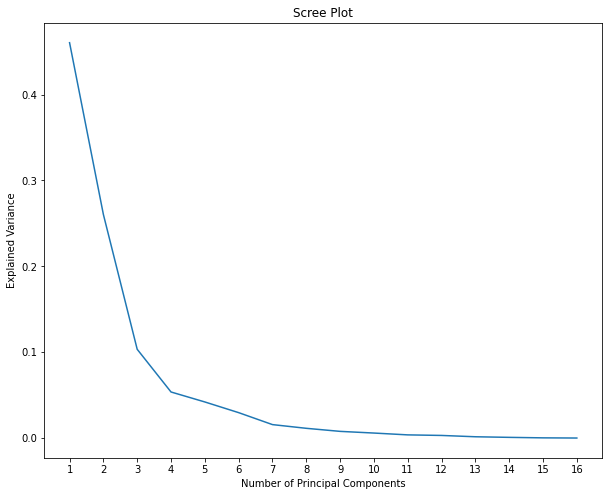

In [25]:
num_components = len(explained_variance)
components = np.arange(1, num_components + 1)
plt.figure(figsize=(10, 8))
plt.plot(components, explained_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.xticks(components)
plt.show()

## ```Plot to find out number of Principal Components needed inorder to capture 95% variance in data```

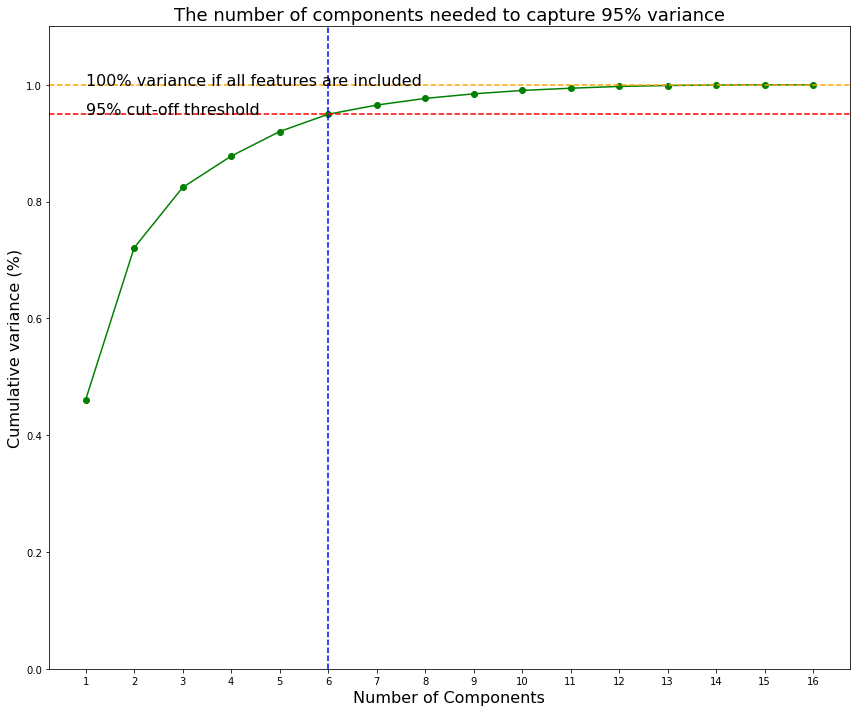

In [26]:
# finding cumulative variance captured by principal components
y_var = np.cumsum(explained_variance)

plt.figure(figsize=(12,10))
plt.ylim(0.0,1.1)
plt.plot(components, y_var, marker='o', linestyle='-', color='green')

plt.xlabel('Number of Components',fontsize=16)
plt.ylabel('Cumulative variance (%)',fontsize=16)
plt.title('The number of components needed to capture 95% variance',fontsize=18)
plt.xticks(components) 

plt.axhline(y=0.95, color='red', linestyle='--')
plt.axhline(y=1.00, color='orange', linestyle='--')
plt.axvline(x=6.00, color='blue', linestyle='--')
plt.text(1, 0.95, '95% cut-off threshold', color = 'black', fontsize=16)
plt.text(1, 1, '100% variance if all features are included', color = 'black', fontsize=16)

plt.tight_layout()
plt.show()

- ```The number of principal components required for efficient prediction might be 6 because we see that the first 6 principal components capture 95% of the complete variance of the data```


- ```We will try a range of components on our regression model to find to determine most efficient number of principal components.```

## ```Model Training and MSE/RMSE Calculation```

## `Train-Test Split`

In [27]:
def split_train_test(data,test_ratio):
    # np.random.seed() is very important as whenever we call the function it will randomly divide the indices
    # it might happen after many calls our model sees all the data and it leads to overfitting so to prevent it
    # seed function will randomly divide data only once and once the function is called it will not give other
    # permuatation of indices whenever called again,hence no overfitting
    np.random.seed(45)
    # it will give random permutation of indices from 0 to len(data)-1
    # now shuffled array will contain random number for eg [0,4,1,99,12,3...]
    shuffled = np.random.permutation(len(data))  
    test_set_size = int(len(data)*test_ratio)
    # it will give array of indices from index 0 to test_set_size-1
    test_indices = shuffled[:test_set_size]
    # it will give array of indices from index test_set_size till last
    train_indices = shuffled[test_set_size:]
    # it will return rows from data df corresponding to indices given in train and test indices array
    # so it is returning the train and test data respectively
    return data.iloc[train_indices], data.iloc[test_indices]

In [28]:
train_set, test_set = split_train_test(df_pca,0.2)

In [29]:
train_set.shape

(258, 17)

In [30]:
x_train = train_set.drop(columns = 'Salary')
x_test = test_set.drop(columns = 'Salary')
x_train.insert(0,'Ones',1)
x_test.insert(0,'Ones',1)
x_train.columns = range(len(x_train.columns))
x_test.columns = range(len(x_test.columns))
y_train = train_set['Salary']
y_test = test_set['Salary']

In [31]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
245,1,-1.043105,-1.497421,-0.202473,1.476653,-0.353427,-0.224182,0.031888,-1.207859,-0.244564,-1.310863,-0.141386,0.280357,0.074904,0.050482,-0.017034,0.036448
303,1,0.439972,1.821266,1.118801,-0.610235,-1.332483,-0.993179,-0.296966,-0.038795,-0.273810,-0.065063,0.359649,-0.423172,0.214949,0.013856,-0.011747,0.015877
99,1,0.185414,0.463587,-1.152667,-0.371452,-0.364472,0.432051,0.090698,-0.301475,0.540013,-0.322312,-0.138558,0.025631,0.149137,-0.004111,0.003751,0.003234
184,1,-1.598821,1.169536,-0.915390,-0.941744,-0.587221,0.715244,0.196005,0.177483,-0.746615,0.122078,-0.347842,0.011736,0.093784,0.225635,0.053897,0.034019
177,1,-1.915195,1.293846,-2.073940,-1.082417,0.246301,-0.776347,-0.240885,-0.505852,0.041886,-0.097253,0.359031,-0.243039,0.081048,-0.047619,0.001139,0.030331


In [32]:
x_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
239,1,2.868446,0.118412,1.473357,-0.157607,0.022377,-0.144813,-0.381052,0.133366,-0.374449,-0.133819,-0.103598,-0.199192,0.165842,-0.070929,0.071949,0.026790
301,1,1.107317,2.256892,2.593587,-0.387524,0.104245,0.416844,0.047641,0.601611,-0.469547,0.382945,-0.401218,0.038017,0.352777,0.100422,0.052209,-0.007845
292,1,-4.128430,-3.702402,1.555729,0.024108,-0.384057,-0.883853,-0.440187,-0.317571,0.603859,0.331207,-0.832470,-0.148219,0.216701,0.015926,0.058142,-0.022348
122,1,0.049561,2.153464,-0.777248,0.054895,-1.821758,0.085294,0.735287,0.207584,-0.149308,-0.233841,-0.074125,-0.419431,0.434665,0.051058,-0.008950,0.000338
279,1,1.815718,1.814290,2.867755,0.267154,-0.556403,-1.313398,0.043599,0.190762,-0.684524,-0.068635,0.109977,0.148037,0.150078,-0.030868,0.049034,0.004292


## `Gradient Descent Algorithm`

- We will use this equation to update our linear regression model parameters

$$
\begin{equation}
\theta_{j} = \theta_{j} - {\alpha}\frac{\partial J(\theta)}{\partial \theta_{j}}  ,\quad\text {$0 \leq j \leq d$} 
\end{equation}
$$

$$
\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_{j}} = \sum_{i=1}^n(h_{\theta}(x) - y^{(i)})*x_{j}^{(i)}, \quad h_{\theta}(x) = \theta_{0} + \theta_{1}x_{1}  + \theta_{2}x_{2}  +  ... +  \theta_{d}x_{d}
\end{equation}
$$

- Repeat until convergence
$$
\begin{equation}
\theta_{j} = \theta_{j} - {\alpha}\sum_{i=1}^n(h_{\theta}(x) - y^{(i)})*x_{j}^{(i)} ,\quad\text {$0 \leq j \leq d$}
\end{equation}
$$

- Such that it minimizes the cost function given by equation

$$
\begin{equation}
J(\theta) = {\frac{1}{2}}\sum_{i=1}^n{(h_{\theta}(x)^{(i)} - y^{(i)})^2}
\end{equation}
$$

In [33]:
def give_train_data(x_train,x_test,k):
    first_k_x_train = x_train.iloc[:,:k+1]
    first_k_x_test = x_test.iloc[:,:k+1]
    return first_k_x_train,first_k_x_test

In [34]:
def give_weight_vector(k):
    weight_vector = np.zeros(k+1)
    return weight_vector

In [35]:
# function to find cost value, using the formula for J(theta)
def find_cost(y_actual,y_predicted):
    cost = 0
    for i in range(len(y_actual)):
        cost += (y_predicted[i] - y_actual[i])**2
    return (1/2)*cost

In [36]:
def print_cost_function(iteration_x_axis_batch,cost_y_axis_batch):
    plt.plot(iteration_x_axis_batch,cost_y_axis_batch)
    plt.xlabel("Iterations")
    plt.ylabel("Cost Value")
    plt.show()

In [37]:
max_iterations = 10000

In [38]:
def batch_gradient_descent(x_train,y_train,x_test,k,learning_rate,iteration_x_axis_batch,cost_y_axis_batch):
    prev_cost = 0
    
    # get x_train and y_train vectors
    x_train_batch, x_test_batch = give_train_data(x_train,x_test,k)
    
    # get the weight vector with degree weights
    weight_vector = give_weight_vector(k)
    
    for iteration in range(max_iterations):
        # will give the predicted value, after each iteration using updated weights
        
        y_predicted = np.dot(x_train_batch,weight_vector) 
        current_cost = find_cost(y_train,y_predicted)
            
        # this loop will update all the parameters one by one
        for theta_j in range(len(weight_vector)):
            
            # defining the xj vector for the column corresponding the weight theta_j
            xj_vector = x_train_batch.iloc[:,theta_j]
            
            # defining the vector representing the difference between predicted and actual values
            difference_actual_predicted_vector = (y_predicted-y_train).reshape(len(x_train_batch),-1)
            
            gradient =  np.dot(xj_vector,difference_actual_predicted_vector)
            weight_vector[theta_j] = weight_vector[theta_j] - learning_rate *gradient

        
        # adding cost to cost array after each iteration
        iteration_x_axis_batch.append(iteration)
        cost_y_axis_batch.append(current_cost)
    
    return weight_vector

In [39]:
# function for finding the predicted value
def find_predicted_value(weight_vector,x_train):
    return np.dot(x_train,weight_vector)

In [40]:
# function for finding mse and sse
def find_mse_rmse(y_actual,y_predicted):
    sse = 0
    for index in range(len(y_actual)):
        sse += (y_actual[index]-y_predicted[index])**2
    mse = sse/len(y_actual)
    rmse = mse**0.5
    return mse,rmse

In [41]:
# scatter plot for predicted and actual values
def plot_graph_predicted_values(y_actual,y_predicted,length):
    plt.scatter([index for index in range(0,length)],y_predicted)
    plt.scatter([index for index in range(0,length)],y_actual,color='orange')
    plt.legend(['Predicted Values','Actual Values'])
    plt.show()

In [42]:
def print_score(y_train_actual,x_train,y_test_actual,x_test,weight_vector,iteration_x_axis_batch,cost_y_axis_batch,k):
    print(f"Cost Function for {k} principal components:\n================================================\n")
    print_cost_function(iteration_x_axis_batch,cost_y_axis_batch)
    
    mse, rmse = find_mse_rmse(y_train_actual,find_predicted_value(weight_vector,x_train))
    print("Train Result:\n================================================\n")
    print("MSE for this regression model is: ",mse)
    print("RMSE for this regression model is: ",rmse)
    plot_graph_predicted_values(y_train_actual,find_predicted_value(weight_vector,x_train),len(x_train))
    
    print("Test Result:\n================================================\n")
    mse, rmse = find_mse_rmse(y_test_actual,find_predicted_value(weight_vector,x_test))
    print("MSE for this regression model is: ",mse)
    print("RMSE for this regression model is: ",rmse)
    plot_graph_predicted_values(y_test_actual,find_predicted_value(weight_vector,x_test),len(x_test))
    return rmse

Cost Function for 1 principal components:



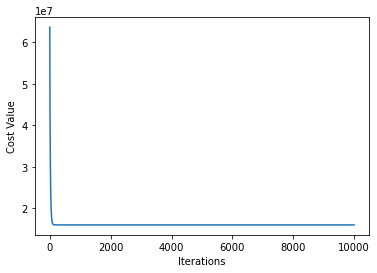

Train Result:

MSE for this regression model is:  124177.47740796996
RMSE for this regression model is:  352.3882481127456


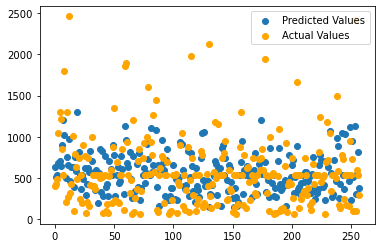

Test Result:

MSE for this regression model is:  69278.84923246955
RMSE for this regression model is:  263.2087559950648


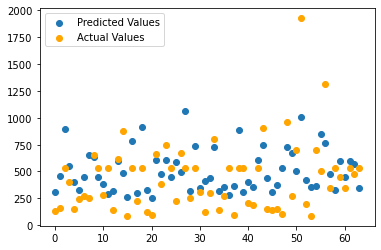

Cost Function for 2 principal components:



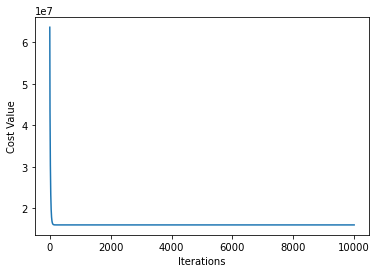

Train Result:

MSE for this regression model is:  123697.4298835931
RMSE for this regression model is:  351.70645413980264


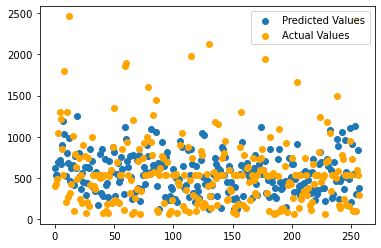

Test Result:

MSE for this regression model is:  67770.56360051801
RMSE for this regression model is:  260.32780028363857


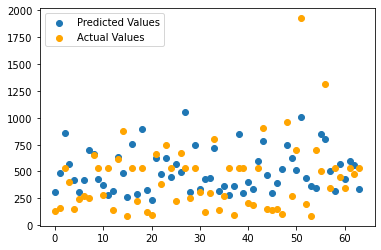

Cost Function for 3 principal components:



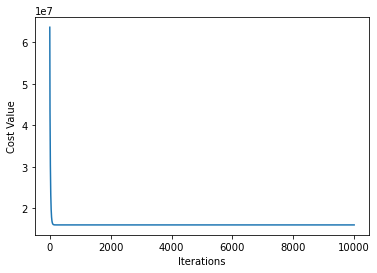

Train Result:

MSE for this regression model is:  123570.97580247452
RMSE for this regression model is:  351.52663597866166


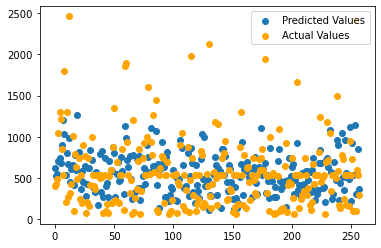

Test Result:

MSE for this regression model is:  66820.58738928533
RMSE for this regression model is:  258.49678409853635


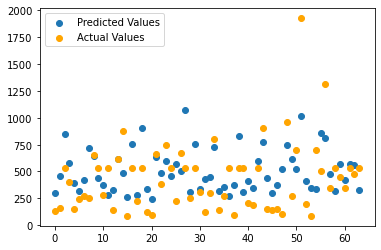

Cost Function for 4 principal components:



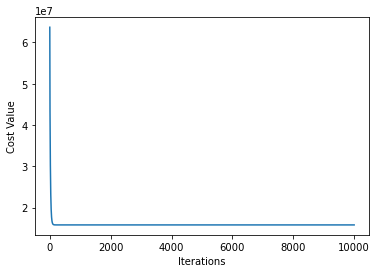

Train Result:

MSE for this regression model is:  122334.69938773432
RMSE for this regression model is:  349.7637765517383


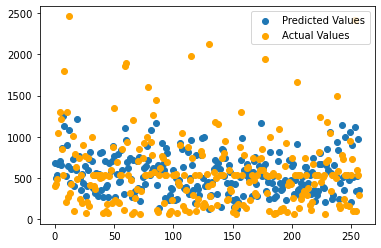

Test Result:

MSE for this regression model is:  62066.5675490257
RMSE for this regression model is:  249.1316269545593


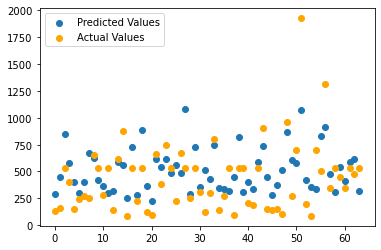

Cost Function for 5 principal components:



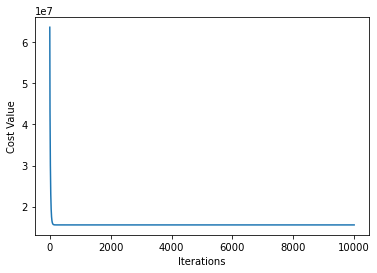

Train Result:

MSE for this regression model is:  120521.4180400181
RMSE for this regression model is:  347.16194785721854


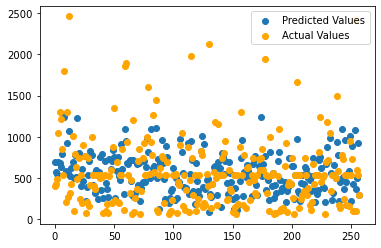

Test Result:

MSE for this regression model is:  63201.32350825243
RMSE for this regression model is:  251.39873410232684


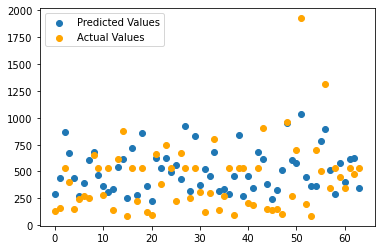

Cost Function for 6 principal components:



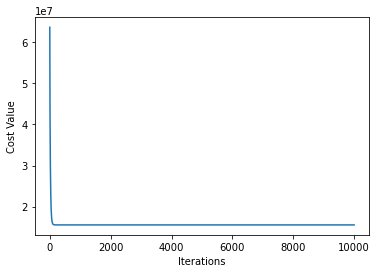

Train Result:

MSE for this regression model is:  120396.31817797363
RMSE for this regression model is:  346.9817260000498


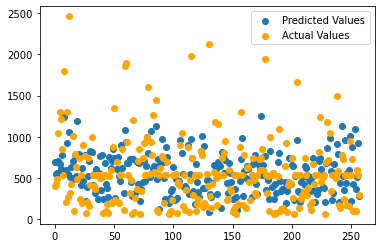

Test Result:

MSE for this regression model is:  63863.26210026061
RMSE for this regression model is:  252.7118163051752


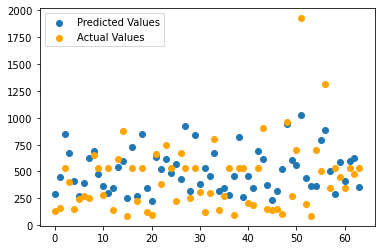

Cost Function for 7 principal components:



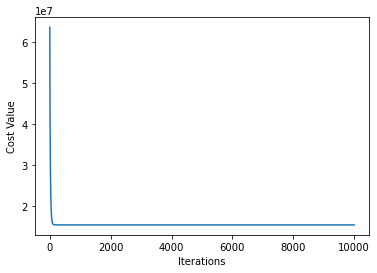

Train Result:

MSE for this regression model is:  120161.94282072148
RMSE for this regression model is:  346.6438270339189


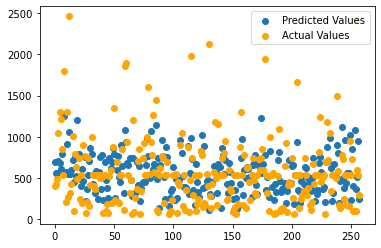

Test Result:

MSE for this regression model is:  64560.02908034867
RMSE for this regression model is:  254.0866566357798


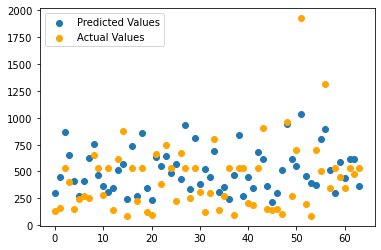

Cost Function for 8 principal components:



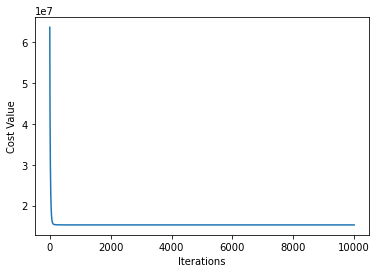

Train Result:

MSE for this regression model is:  118408.7859839223
RMSE for this regression model is:  344.105777318432


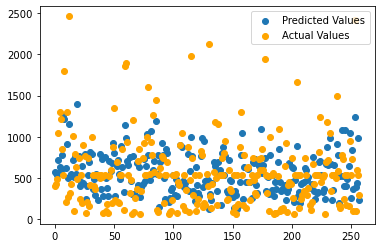

Test Result:

MSE for this regression model is:  69123.42067059061
RMSE for this regression model is:  262.9133330027038


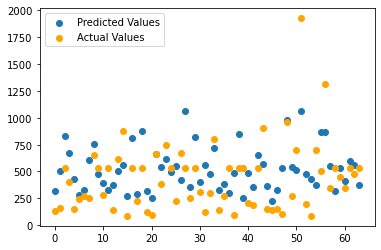

Cost Function for 9 principal components:



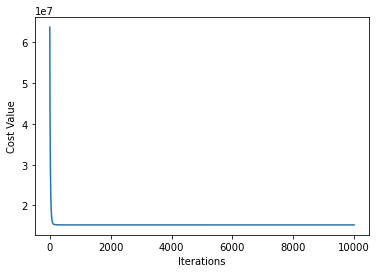

Train Result:

MSE for this regression model is:  118148.52607634694
RMSE for this regression model is:  343.727400822726


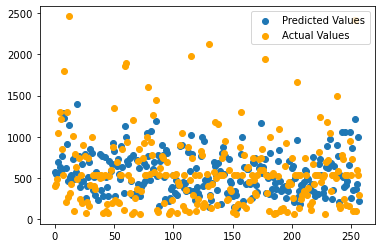

Test Result:

MSE for this regression model is:  69250.44213423833
RMSE for this regression model is:  263.1547874051284


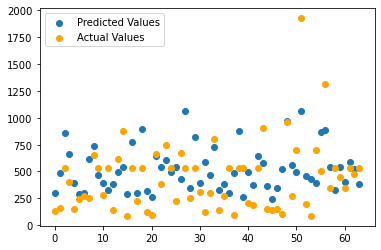

Cost Function for 10 principal components:



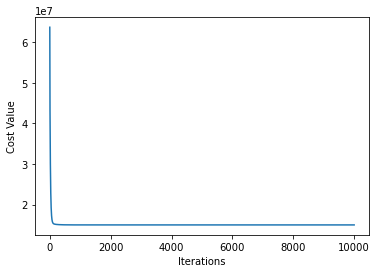

Train Result:

MSE for this regression model is:  116369.78391706859
RMSE for this regression model is:  341.1301568566881


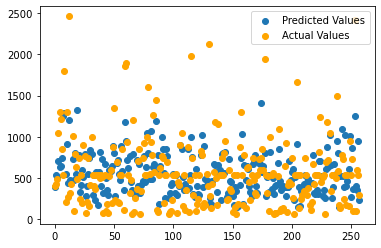

Test Result:

MSE for this regression model is:  68580.68915696764
RMSE for this regression model is:  261.8791499088227


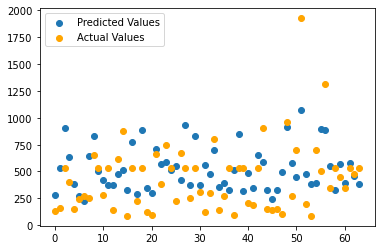

Cost Function for 11 principal components:



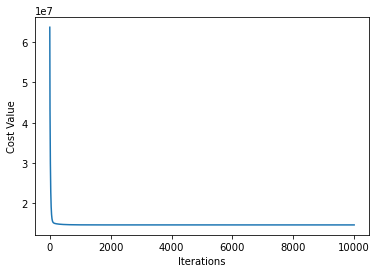

Train Result:

MSE for this regression model is:  113834.33104056367
RMSE for this regression model is:  337.3934365700727


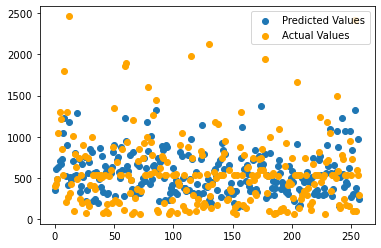

Test Result:

MSE for this regression model is:  63896.603778246
RMSE for this regression model is:  252.77777548322163


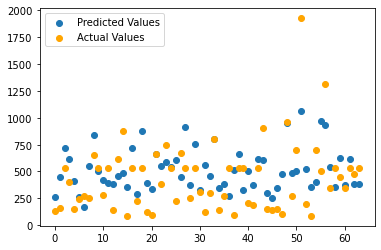

Cost Function for 12 principal components:



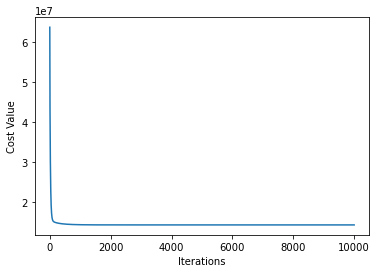

Train Result:

MSE for this regression model is:  110365.84926859835
RMSE for this regression model is:  332.2135597301807


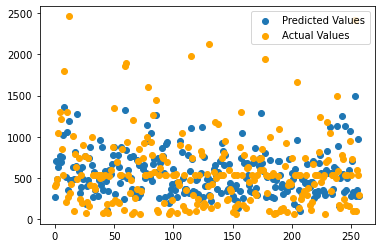

Test Result:

MSE for this regression model is:  67466.74403470497
RMSE for this regression model is:  259.743612115303


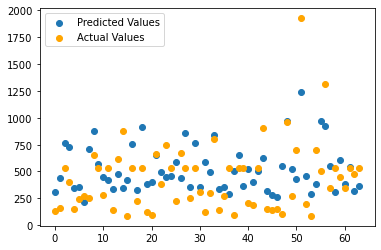

Cost Function for 13 principal components:



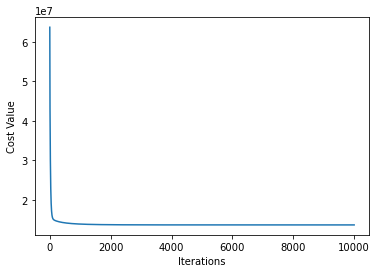

Train Result:

MSE for this regression model is:  105564.36312737507
RMSE for this regression model is:  324.90669911126037


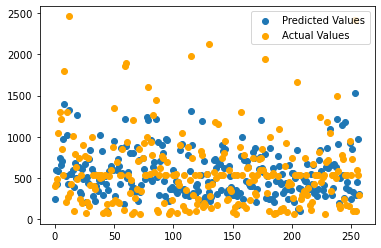

Test Result:

MSE for this regression model is:  66523.98614214815
RMSE for this regression model is:  257.9224421064366


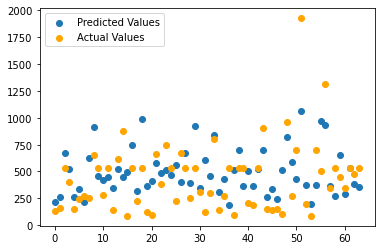

Cost Function for 14 principal components:



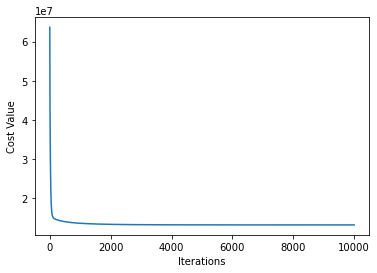

Train Result:

MSE for this regression model is:  102214.10306544695
RMSE for this regression model is:  319.70940409291524


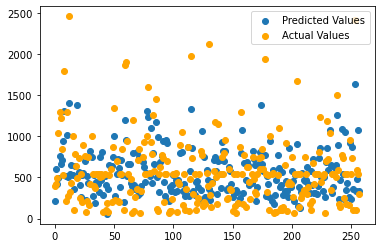

Test Result:

MSE for this regression model is:  71587.0821505513
RMSE for this regression model is:  267.5576239813609


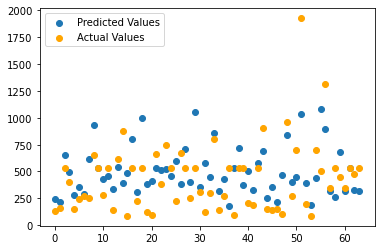

Cost Function for 15 principal components:



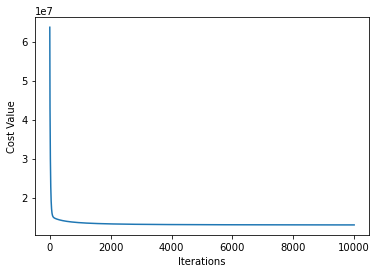

Train Result:

MSE for this regression model is:  100747.2834013865
RMSE for this regression model is:  317.4071256310836


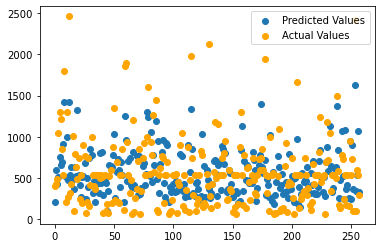

Test Result:

MSE for this regression model is:  72261.0666914737
RMSE for this regression model is:  268.8141861797359


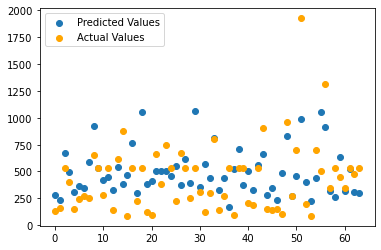

Cost Function for 16 principal components:



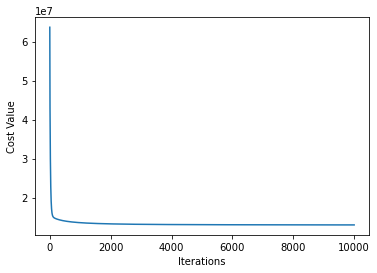

Train Result:

MSE for this regression model is:  100687.48903965203
RMSE for this regression model is:  317.3129197490263


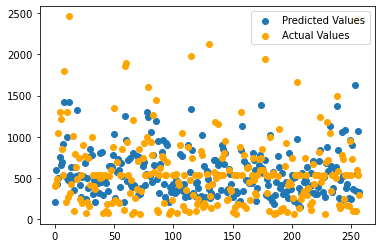

Test Result:

MSE for this regression model is:  72515.0589964796
RMSE for this regression model is:  269.28620275921975


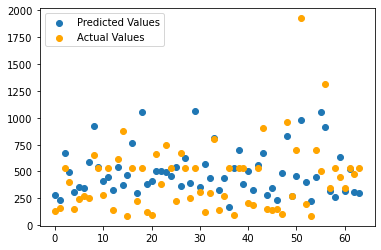

In [43]:
# for alpha = 0.0001
learning_rate = 0.0001

y_train = np.array(y_train)
y_test = np.array(y_test)
rmse_arr = []

# trying for different number of principal components
for k in range(1,17):
    iteration_x_axis_batch = []
    cost_y_axis_batch = []
    weight_vector = batch_gradient_descent(x_train,y_train,x_test,k,learning_rate,iteration_x_axis_batch,cost_y_axis_batch)
    x_train_k, x_test_k = give_train_data(x_train,x_test,k)
    rmse_arr.append(print_score(y_train,x_train_k,y_test,x_test_k,weight_vector,iteration_x_axis_batch,cost_y_axis_batch,k))

## ``` Plotting Number of Components vs RMSE```

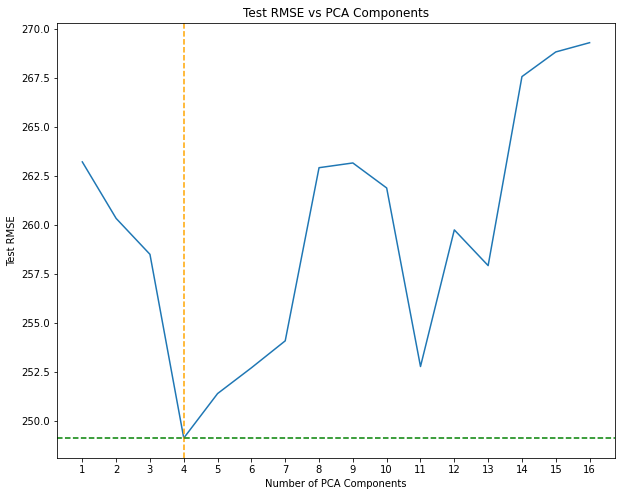

In [44]:
# graph showing rmse vs number of pca components
pca_components = [x for x in range(1,17)]
plt.figure(figsize=(10, 8))
plt.plot(pca_components,rmse_arr)
plt.xlabel('Number of PCA Components')
plt.ylabel('Test RMSE')
plt.title('Test RMSE vs PCA Components')
plt.axvline(x=4,color='orange',linestyle='--')
plt.axhline(y=rmse_arr[3],color='green',linestyle='--')
plt.xticks(pca_components)
plt.show()

- Initially, as the number of ```components increases```, the ```RMSE decreases```. This is because a higher number of components capture more variance in the data, allowing the model to predict the underlying patterns better.


- We see that ```minimum rmse is captured when we take 4 principal components```. The model captures enough information from the data without overfitting to the noise.


- Beyond 4 number of components, we see that adding more components does not improve the performance. In fact, it ```leads to overfitting```, where the model starts ```capturing noise```in the data rather than genuine patterns.

## ```Testing the Most Efficient Model```

In [45]:
# optimal model is one with 4 principal components as per graph

Cost Function for 4 principal components:



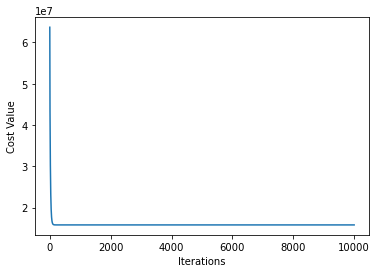

Train Result:

MSE for this regression model is:  122334.69938773432
RMSE for this regression model is:  349.7637765517383


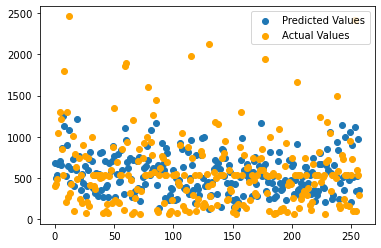

Test Result:

MSE for this regression model is:  62066.5675490257
RMSE for this regression model is:  249.1316269545593


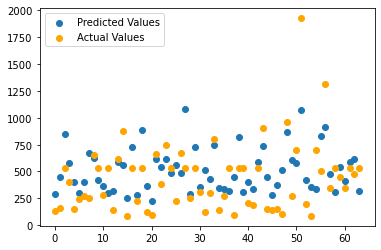

In [46]:
iteration_x_axis_batch = []
cost_y_axis_batch = []
learning_rate = 0.0001

weight_vector = batch_gradient_descent(x_train,y_train,x_test,4,learning_rate,iteration_x_axis_batch,cost_y_axis_batch)
x_train_k , x_test_k = give_train_data(x_train,x_test,4)
print_score(y_train,x_train_k,y_test,x_test_k,weight_vector,iteration_x_axis_batch,cost_y_axis_batch,4)
print()

In [47]:
y_pred = find_predicted_value(weight_vector,x_test_k)
y_pred

array([ 292.09190287,  444.0216452 ,  844.54823872,  579.87082768,
        401.82204258,  298.5314266 ,  403.0507171 ,  668.10867811,
        628.13093754,  422.21433009,  363.55847907,  300.13178713,
        317.8443312 ,  588.79558347,  561.04482364,  248.84498554,
        724.42351648,  277.3756033 ,  888.83650636,  369.28796575,
        223.0068406 ,  618.96757355,  545.69050979,  612.03623706,
        485.98976768,  561.95193564,  487.0417952 , 1077.82394794,
        292.78949674,  727.92596284,  358.9555134 ,  513.57102203,
        431.82978973,  748.1268539 ,  342.57088434,  337.73796565,
        320.67487105,  445.53536206,  824.31655246,  313.31294985,
        401.99808253,  338.63199682,  585.42909667,  734.4708019 ,
        445.25434793,  283.46051658,  376.60885062,  513.26476444,
        871.17425811,  607.48603174,  577.23002525, 1075.34912294,
        418.86287162,  357.32219951,  334.85303463,  828.48092741,
        909.39983168,  473.0545686 ,  307.76323673,  546.23384

In [48]:
# predicted value for a single point
y_pred[:1]

array([292.09190287])

## ```Conclusion and Analysis```

### ```Significance of selecting an appropriate number of components```

- PCA reduces the dimensionality of the dataset by transforming it into a new set of uncorrelated variables. This takes care of capturing the required information and not overfitting by capturing the noise of the data.


- A lower number of components simplifies the model and also makes the computation easy.


- It is easier to understand and interpret the contribution of each principal component to the overall prediction.